# importando bibliotecas

In [34]:
import pandas as pd
import matplotlib as plot
from sklearn.linear_model import Ridge

# carregando o dataset

In [35]:
#dataset retirado de https://www.ncdc.noaa.gov/cdo-web/search, foi pego os
#dados de oakland, uma cidade localizada no estado americano da Califórnia, no condado de Alameda
#podendo ser feito em qualquer cidade.
#https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf

df = pd.read_csv('local_weather.csv', index_col='DATE')

# analisando os dados


In [36]:
df.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [37]:
#visualizando a porcentagem de valores nulos em cada coluna

df.apply(pd.isnull).sum()/df.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

# selecionando o principal

In [38]:
#colunas indicadas pela documentação da base de dados
core_tempo = df[['PRCP','SNOW','SNWD','TMAX','TMIN']].copy()
core_tempo.columns = ["preci","neve","prof_neve","max_temp","min_temp"]

# analisando novamente


In [39]:
core_tempo.head()

,preci,neve,prof_neve,max_temp,min_temp
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0


In [40]:
core_tempo.apply(pd.isnull).sum()/df.shape[0]

preci        0.016668
neve         0.324990
prof_neve    0.317634
max_temp     0.000534
min_temp     0.000593
dtype: float64

# preparando para ML

In [41]:
core_tempo['neve'].value_counts()

#nevou apenas uma vez em toda a base, retiraremos a neve por não ser util ao modelo, consequentemente a profundidade da neve
#também sera desconsiderada

0.0    11379
1.0        1
Name: neve, dtype: int64

In [42]:
del core_tempo['neve']
del core_tempo['prof_neve']

In [43]:
core_tempo

,preci,max_temp,min_temp
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [44]:
#substituindo as colunas com precipitação nula por 0

core_tempo["preci"] = core_tempo["preci"].fillna(0)
core_tempo.isnull().sum()

preci        0
max_temp     9
min_temp    10
dtype: int64

In [45]:
#limpando o max temp e min temp

In [46]:
core_tempo = core_tempo.fillna(method="ffill")

# verificando erros no dataset

In [47]:
#erros relatados na documenta;ao
core_tempo.apply(lambda x:(x==9999)).sum()

preci       0
max_temp    0
min_temp    0
dtype: int64

In [48]:
# transformando o index em data, para visualizarmos melhor
core_tempo.index = pd.to_datetime(core_tempo.index)

<AxesSubplot:xlabel='DATE'>

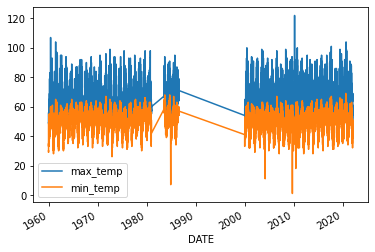

In [49]:
# visualizando as informa;

core_tempo[["max_temp","min_temp"]].plot()

In [50]:
#alguns outliners e lacunas entre 1990 e 2000, mas não atrapalhará tanto o modelo

In [51]:
#averigando os dados
core_tempo.groupby(core_tempo.index.year).sum()

,preci,max_temp,min_temp
DATE,,,
1960,14.01,24135.0,17973.0
1961,13.87,24202.0,17819.0
1962,22.47,23785.0,17880.0
1963,19.11,23470.0,18237.0
1964,16.83,23013.0,18637.0
1965,16.32,23181.0,18715.0
1966,13.11,23680.0,18991.0
1967,23.98,23433.0,18668.0
1968,17.19,23634.0,18859.0


In [52]:
# vamos criar um objetivo para nosso modelo tentar acertar, no caso será a temperatura maxima do proximo dia

In [53]:
core_tempo["target"] = core_tempo.shift(-1)["max_temp"]
core_tempo

,preci,max_temp,min_temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [54]:
core_tempo = core_tempo.iloc[:-1,:].copy()


# criando o modelo


In [63]:
reg = Ridge(alpha=.1)

In [69]:
predictors = ["preci", "max_temp", "min_temp"] #definindo oque sera usado para prever o target.

In [70]:
train = core_tempo.loc[:"2020-12-31"]
test = core_tempo.loc["2021-01-01":]

In [71]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [74]:
predictions = reg.predict(test[predictors])

In [75]:
from sklearn.metrics import mean_absolute_error

In [76]:
mean_absolute_error(test["target"], predictions)

3.4111699434528306

## comparando o teste com oque o modelo previu

In [81]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["atual", "previsao"]

In [82]:
combined

,atual,previsao
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


<AxesSubplot:xlabel='DATE'>

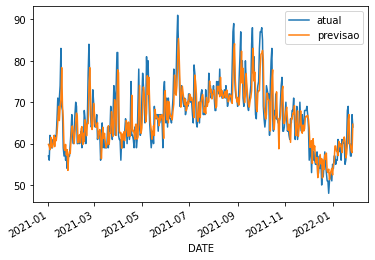

In [83]:
combined.plot()

In [85]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])